# Ruina gracza
Proszę zasymulować N=100 procesów ruiny gracza z łącznymi kapitałami początkowymi a = b = 50.

Proszę wyznaczyć wykres prawdopodobieństwa średniego trwania rozgrywki (wartość znana z poprzedniego zadania) w zależności od prawdopodobieństwa p.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def single_game(a_fortune, b_fortune, p):
    duration = 0
    while a_fortune > 0 and b_fortune > 0:
        duration += 1
        a_status = np.random.uniform(0, 1) < p
        a_fortune += 1 if a_status else -1
        b_fortune += -1 if a_status else 1 
    return duration

In [3]:
def simulation(game_num, a_fortune, b_fortune, p):
    durations_sum = 0
    for _ in range(game_num):
        durations_sum += single_game(a_fortune, b_fortune, p)
    return durations_sum / game_num

In [4]:
game_num = 100
a_init_fortune = 50
b_init_fortune = 50

probs = np.sort(np.concatenate((np.arange(0.4, 0.6, 0.001), np.arange(0, 1.001, 0.01))))

In [5]:
avg_durations = []
for p in probs:
    avg_durations.append(simulation(game_num, a_init_fortune, b_init_fortune, p))

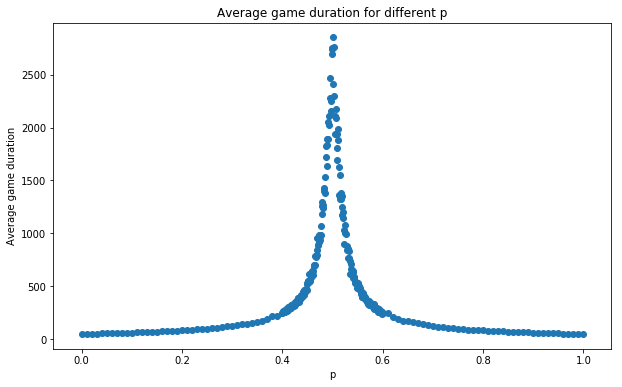

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(probs, avg_durations)

plt.title(f'Average game duration for different p')
plt.xlabel('p')
plt.ylabel('Average game duration')
plt.show()